In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config Inlinebackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
%%capture
#!pip install networkx

# If an error saying "Random state is incorrect" appears, 
# run the line below, and stop the jupyter server from the terminal,
# start it again and refresh the browser tab.
#!pip install "decorator<4"

In [3]:
# Let´s welcome a new library!
import networkx as nx

In [4]:
# Let's create a function to help us. (You don't need to know right now what they do.)
def display_centrality_graph(graph, centrality_values, new_range_max=10000, new_range_min=300):
    node_sizes = [v for (n, v) in centrality_values.items()]

    new_range = new_range_max - new_range_min
    old_range_min = min(node_sizes)
    old_range_max = max(node_sizes)
    old_range = old_range_max - old_range_min
    node_sizes = [(new_range_min + (((v - old_range_min) / old_range) * new_range)) for v in node_sizes]

    plt.figure(figsize=(15, 9))
    plt.axis("off")
    nx.draw_networkx(G=graph, node_size=node_sizes, node_color='g', font_color='k', alpha=0.9, font_size=20)

# Networks

Today we are going to learn about networks.

## What are networks and why should we care?

Networks are a way of representing relationship between elements:
- relationships between people,
- distances between cities,
- connections between computers...

Networks, sometimes called *graphs*, are composed by two things: **nodes** and **links**.

Nodes (or vertices) represent the objects, the links (or edges) the connections between them.

How do they look and how do we use them in Python?

In [5]:
G = nx.Graph()

In [6]:
G

In [7]:
# To add 4 nodes to our graph, we use:
G.add_nodes_from([0, 1, 2, 4])

# To add 4 edges, we can give a list of tuples of the nodes we want to join
G.add_edges_from([(0,1), (1,2), (2,0), (0,4)])

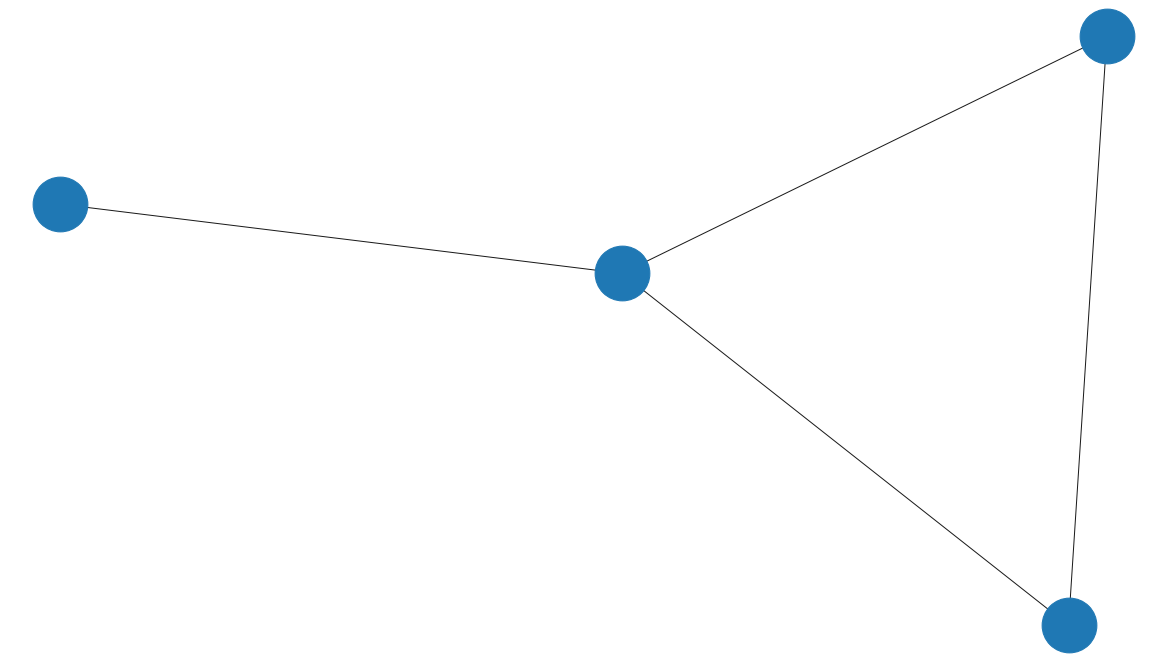

In [9]:
# We can draw the node really easily!
nx.draw(G, node_size=3000)

# (note: the way Python plots the graph/network may vary)

# Centrality

We can study many things in a network. For example, we can study **how important** a node is. That's what we call *centrality*: the more central a node is, the more important it is in the network.

Imagine that you need to know the most influential person among a set of people in a party, and you only know the connections between those people. You should look at how central the people are to find it!

Let's see this with a real world example:

## The importance of being central: The Medici

We analyse the network of marriage links between the main Florentine families. Two families were in conflict: the Medici and the Strozzi. Power and money were the reasons. The Medici family did not have greatest wealth or most seats in the legislature, yet it rose to power. Through marriages, the Medici family had a position of centrality in the social network, crucial for communication, brokering deals, etc.


You can read more about the rise of the Medici in the original paper from Padgett: *Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500; in the Social Science History Association*.

In [10]:
# First, we create the graph with the initial data that's already in Netowrkx
G = nx.florentine_families_graph()

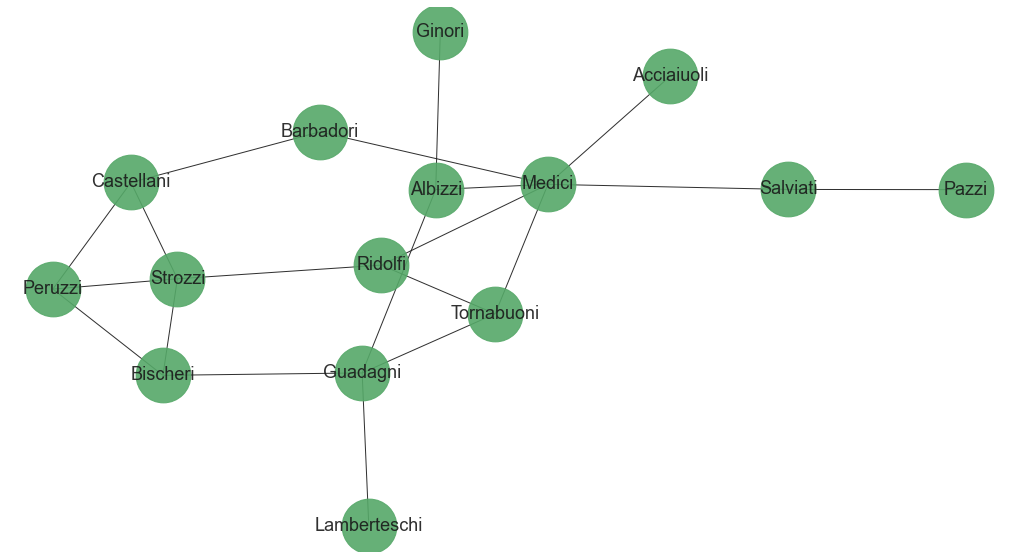

In [12]:
# Then we plot the network
plt.figure(figsize=(18, 10))
plt.axis("off")

nx.draw_networkx(G=G, node_size=3000, node_color='g', font_color='k', alpha=0.9, font_size=18)

What we observe above is:
- a set of nodes (with the family names on top)
- lines between them which mean relationships (in this case, marriages)
- all the nodes have the same size


There are many different ways of measuring centrality: with the degree, with the centrality, with the betweeness... Let's look at them!

## Degree centrality

A way of measuring how **central** or important a node is, is by looking at its degree. The degree is defined as the number of edges pointing to a node. We measure the degree of each node.

(*Note*: you can find more information about these centrality measures [here](https://en.wikipedia.org/wiki/Centrality#Degree_centrality).)

Networkx has some neat functions for computing centrality measures. For example, for the degree centrality:

In [13]:
nx.degree_centrality(G)

{'Acciaiuoli': 0.07142857142857142,
 'Medici': 0.42857142857142855,
 'Castellani': 0.21428571428571427,
 'Peruzzi': 0.21428571428571427,
 'Strozzi': 0.2857142857142857,
 'Barbadori': 0.14285714285714285,
 'Ridolfi': 0.21428571428571427,
 'Tornabuoni': 0.21428571428571427,
 'Albizzi': 0.21428571428571427,
 'Salviati': 0.14285714285714285,
 'Pazzi': 0.07142857142857142,
 'Bischeri': 0.21428571428571427,
 'Guadagni': 0.2857142857142857,
 'Ginori': 0.07142857142857142,
 'Lamberteschi': 0.07142857142857142}

Visually, we can plot the network and make the nodes bigger when they are more central.

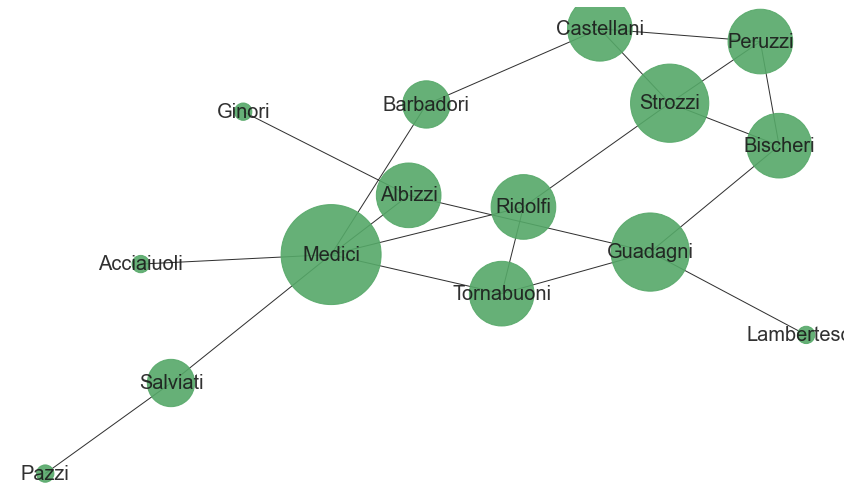

In [14]:
# This is the function defined at the top of the notebook.
#
# It just takes the graph and the centrality measure, and 
# makes the nodes larger when the centrality is bigger.
#
display_centrality_graph(graph=G, centrality_values=nx.degree_centrality(G))


What we see is that the Medici family has the largest node, meaning it has the largest degree centrality (has the most links/edges).

Using this measure, the Medici is the most important family.

## Closeness centrality

The closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer (or better connected) it is to all other nodes.

We can compute it as:
$$C(x)= \frac{1}{\sum_y d(y,x)}$$

In [15]:
nx.closeness_centrality(G)

{'Acciaiuoli': 0.3684210526315789,
 'Medici': 0.56,
 'Castellani': 0.3888888888888889,
 'Peruzzi': 0.3684210526315789,
 'Strozzi': 0.4375,
 'Barbadori': 0.4375,
 'Ridolfi': 0.5,
 'Tornabuoni': 0.4827586206896552,
 'Albizzi': 0.4827586206896552,
 'Salviati': 0.3888888888888889,
 'Pazzi': 0.2857142857142857,
 'Bischeri': 0.4,
 'Guadagni': 0.4666666666666667,
 'Ginori': 0.3333333333333333,
 'Lamberteschi': 0.32558139534883723}

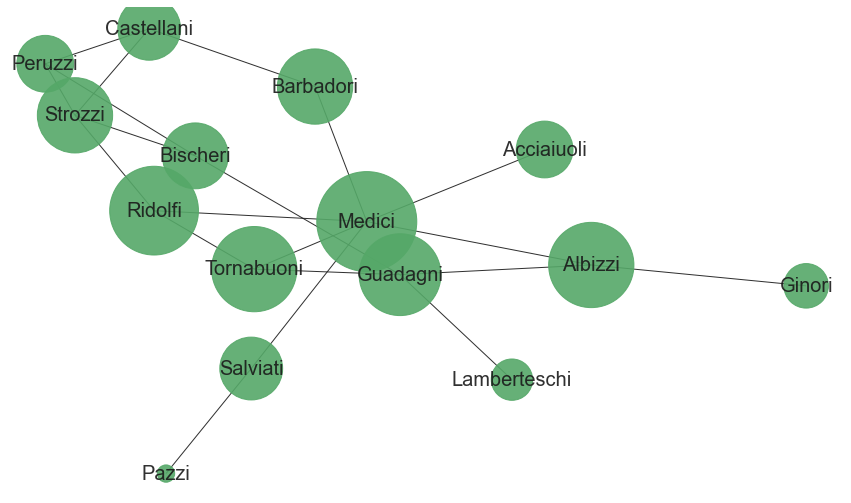

In [16]:
display_centrality_graph(graph=G, centrality_values=nx.closeness_centrality(G))

We see there are some families that have a good closeness measure (their node is big). But the biggest is, again, the Medici.

## Exercise

Create a functiion to pass a centrality measure and return those values ordered from most to least central.

In [18]:
vals = []
for key,val in nx.closeness_centrality(G).items():
    vals.append((key, val))


In [20]:
sorted(vals, key=lambda x: -x[1])

[('Medici', 0.56),
 ('Ridolfi', 0.5),
 ('Tornabuoni', 0.4827586206896552),
 ('Albizzi', 0.4827586206896552),
 ('Guadagni', 0.4666666666666667),
 ('Strozzi', 0.4375),
 ('Barbadori', 0.4375),
 ('Bischeri', 0.4),
 ('Castellani', 0.3888888888888889),
 ('Salviati', 0.3888888888888889),
 ('Acciaiuoli', 0.3684210526315789),
 ('Peruzzi', 0.3684210526315789),
 ('Ginori', 0.3333333333333333),
 ('Lamberteschi', 0.32558139534883723),
 ('Pazzi', 0.2857142857142857)]

Are you curious on how to actually compute the shortest distance between two nodes? Take a look at this video explaining a famous algorithm to calculate it! The [Dijkstra´s algorithm](https://www.youtube.com/watch?v=GazC3A4OQTE&t=550s)

## Eigenvector centrality

Eigenvector centrality (also called eigencentrality) is a measure of the **influence of a node in a network**.  It is a way of measuring how important a node is by assigning relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. 

Google's PageRank (the algorithm Google uses to show you pages when you search) are variants of the eigenvector centrality.

The formal definition is: 
For a given graph $G:=(V,E)$ with $|V|$ number of vertices let $A = (a_{v,t})$ be the adjacency matrix, i.e. $a_{v,t} = 1$ if vertex $v$ is linked to vertex $t$, and $a_{v,t} = 0$ otherwise. The relative centrality score of vertex $v$ can be defined:

$$x_v = \frac{1}{\lambda} \sum_{t \in M(v)}x_t = \frac{1}{\lambda} \sum_{t \in G} a_{v,t}x_t$$

where $M(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant. With a small rearrangement this can be rewritten in vector notation as the eigenvector equation
$$\mathbf{Ax} = {\lambda}\mathbf{x}.$$

In [21]:
nx.eigenvector_centrality(G)

{'Acciaiuoli': 0.1321573195285342,
 'Medici': 0.4303154258349923,
 'Castellani': 0.2590200378423514,
 'Peruzzi': 0.2757224374104833,
 'Strozzi': 0.3559730326460451,
 'Barbadori': 0.2117057470647985,
 'Ridolfi': 0.3415544259074365,
 'Tornabuoni': 0.325846704169574,
 'Albizzi': 0.2439605296754477,
 'Salviati': 0.14592084164171834,
 'Pazzi': 0.044814939703863084,
 'Bischeri': 0.2827943958713356,
 'Guadagni': 0.2891171573226501,
 'Ginori': 0.0749245316027793,
 'Lamberteschi': 0.08879253113499548}

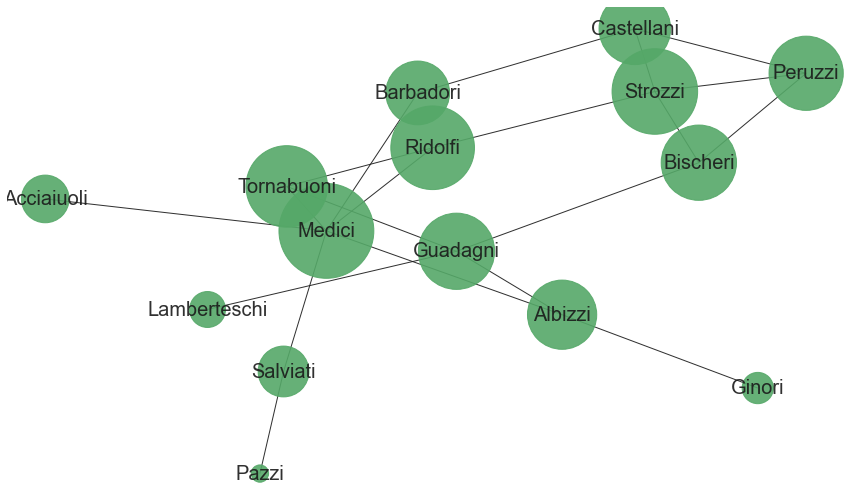

In [22]:
display_centrality_graph(graph=G, centrality_values=nx.eigenvector_centrality(G), new_range_max=9000)

## Betweenness centrality

Betweenness centrality is the last measure we are going to see. it quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

The betweenness of a vertex $v$ in a graph $G:=(V,E)$ with $V$ vertices is computed as follows:

* For each pair of vertices $(s,t)$, compute the shortest paths between them.
* For each pair of vertices $(s,t)$, determine the fraction of shortest paths that pass through the vertex in question (here, vertex $v$).
* Sum this fraction over all pairs of vertices $(s,t)$.

In [23]:
nx.betweenness_centrality(G)

{'Acciaiuoli': 0.0,
 'Medici': 0.521978021978022,
 'Castellani': 0.05494505494505495,
 'Peruzzi': 0.02197802197802198,
 'Strozzi': 0.10256410256410257,
 'Barbadori': 0.09340659340659341,
 'Ridolfi': 0.11355311355311355,
 'Tornabuoni': 0.09157509157509157,
 'Albizzi': 0.21245421245421245,
 'Salviati': 0.14285714285714288,
 'Pazzi': 0.0,
 'Bischeri': 0.1043956043956044,
 'Guadagni': 0.2545787545787546,
 'Ginori': 0.0,
 'Lamberteschi': 0.0}

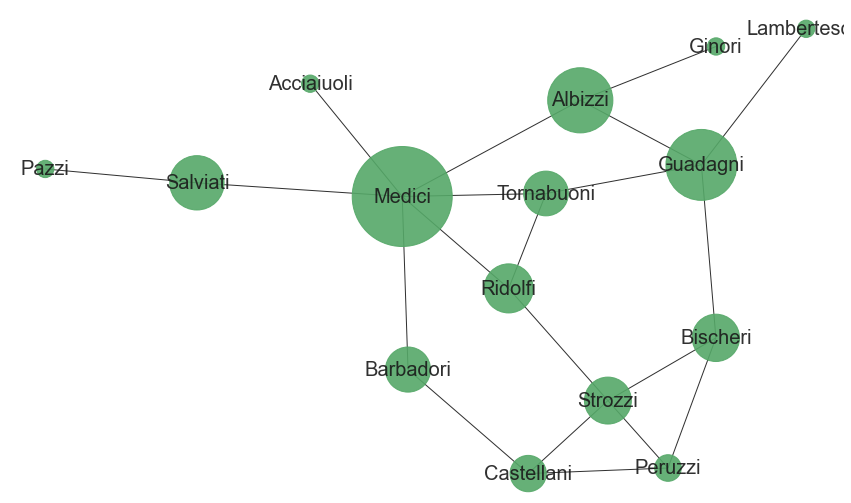

In [24]:
display_centrality_graph(graph=G, centrality_values=nx.betweenness_centrality(G))

This centrality measure shows us which family acts as a bridge between two other families. It is an important measure even today: being able to act as an intermediary between to parts is crucial in many fields (marketing, sales...).

## Recap
We have observed in all the networks that the Medici family has the largest node, which means that it is the most central / important: the Medici had the most power because it had the most links (degree centrality), their connections were the shortest connections between nodes (closeness centrality), they were the most influential (eigenvector centrality), and they acted as bridges in the shortest paths between nodes (betweeness centrality).

There's another interesting analysis we can perform on a network: community analysis. This is a way of finding communities just by the structure of the network.


# Detecting communities: The Zackary Karate Club

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. 

Based on collected data, Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.


This is the initial network:

In [25]:
G = nx.karate_club_graph()

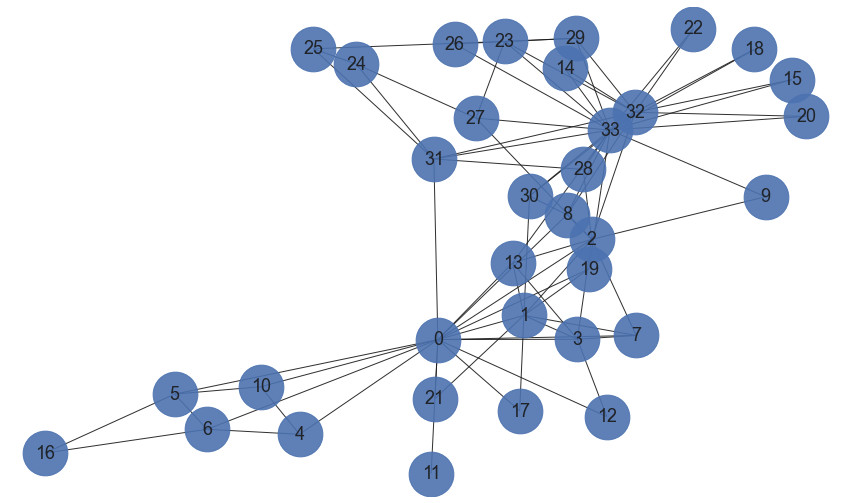

In [26]:
plt.figure(figsize=(15, 9))
plt.axis("off")

# Graphs are difficult to draw well, so there are 
# several algorithms to display the information.
pos=nx.spring_layout(G)

nx.draw_networkx(G=G, pos=pos ,node_size=2000, node_color='b', font_color='k', alpha=0.9, font_size=18)

The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities (like bridges).

The algorithm's steps for community detection are summarized below

* The betweeness of all existing edges in the network is calculated first.
* The edge(s) with the highest betweeness are removed.
* The betweeness of all edges affected by the removal is recalculated.
* Steps 2 and 3 are repeated until no edges remain.

In [27]:
from networkx.algorithms.community.centrality import girvan_newman
import itertools

In [33]:
comp = girvan_newman(G)

# The Girvan-Newman algorithm gives us many results (check comp)
# of what it thinks of the possible communities in the network.
# We know there should be 2 communities (because the Karate club split into 2).
#
# How many communities to look for is not easy. We don't know for sure how
# many communities there are in a network without any extra information (like
# the karate club spliting into 2).
#
# The function islice from itertools allows us to stop at a certain 
# value when iterating (the numebr 1)
for communities in itertools.islice(comp, 1):
    print(f'Communities: {tuple(sorted(c) for c in communities)}')

Communities: ([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


We can plot the network with different colors:

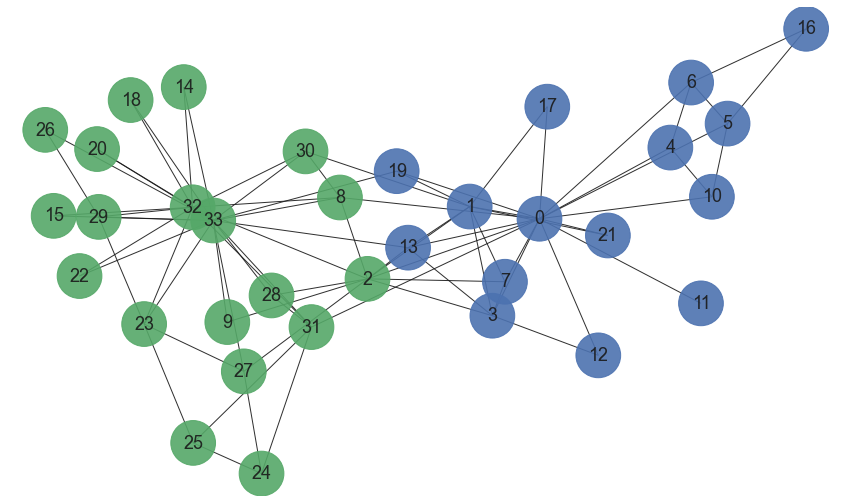

In [30]:
plt.figure(figsize=(15, 9))
plt.axis("off")

# We select blue if the node is in the first comminuty and green if it is in the second.
node_colors = ['b' if (n in communities[0]) else 'g' for n in G.nodes()]

nx.draw_networkx(G=G, pos=pos,node_size=2000, node_color=node_colors, font_color='k', alpha=0.9, font_size=18)

In [ ]:
plt.figure(figsize=(15, 9))
plt.axis("off")

# We select blue if the node is in the first comminuty and green if it is in the second.
node_colors = ['b' if (n in communities[0]) else 'g' for n in G.nodes()]

nx.draw_networkx(G=G, pos=pos,node_size=2000, node_color=node_colors, font_color='k', alpha=0.9, font_size=18)

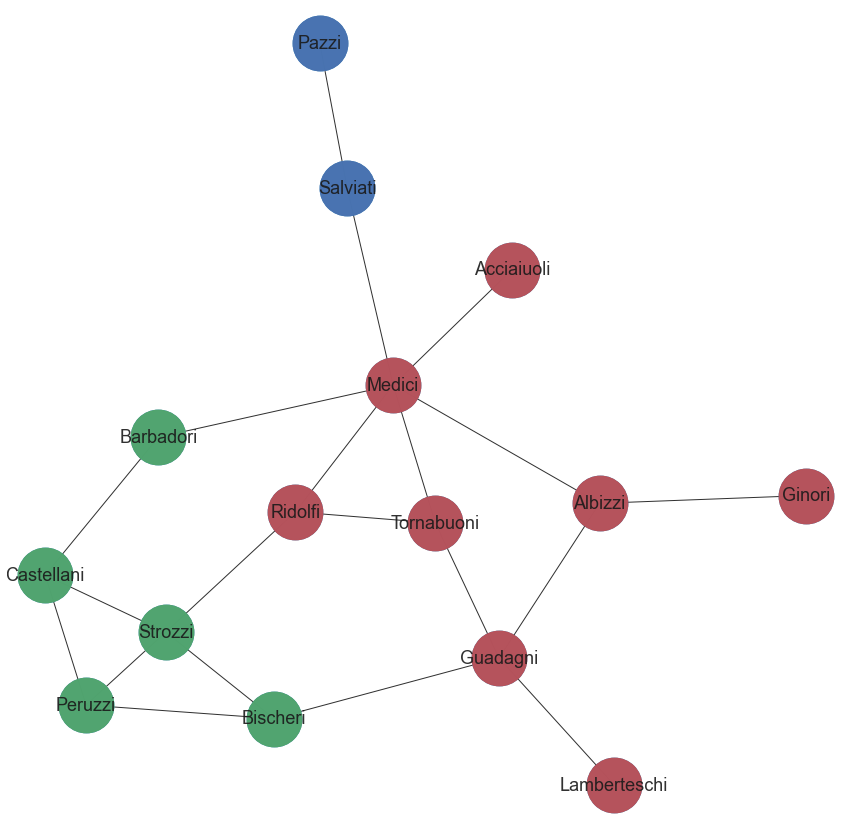

In [34]:
# Back to the Medici
G = nx.florentine_families_graph()
pos=nx.spring_layout(G)
comp = girvan_newman(G)

# Here, we can tweak the number and see how many communities in can find.
for communities in itertools.islice(comp, 2):
    tuple(sorted(c) for c in communities)

plt.figure(figsize=(15, 15))
plt.axis("off")

# create the network without the nodes
params = {'G': G, 'pos': pos, 'node_size': 3000, 'alpha': 0.9}
nx.draw_networkx(**params, font_color='k', font_size=18)

colors = ['r','g', 'b', 'orange', 'yellow']

# for each community list, draw the nodes, giving it a specific color.
for x in range(len(communities)):
    nx.draw_networkx_nodes(**params, nodelist=communities[x], node_color=colors[x])

## Game of Thrones Network

Data and original idea are taken from this [blog entry](https://networkofthrones.wordpress.com/)

In [35]:
got_data = pd.read_csv('../data/GOT-edges.csv')
got_data

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [36]:
# Remove non important columns
got_data.drop(['Type', 'id', 'weight'], axis=1, inplace=True)
got_data

,Source,Target
0,Addam-Marbrand,Brynden-Tully
1,Addam-Marbrand,Cersei-Lannister
2,Addam-Marbrand,Gyles-Rosby
3,Addam-Marbrand,Jaime-Lannister
4,Addam-Marbrand,Jalabhar-Xho
...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke
2819,Waymar-Royce,Will-(prologue)
2820,Weasel,Weese
2821,Woth,Yoren


In [37]:
# We can create a graph from a pandas dataframe as if it were an edge list.
G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')

## Centrality measures in GOT

Who's the most important character according to the centrality measures we've seen?

In [38]:
dict(sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.15345911949685534,
 'Jon-Snow': 0.14339622641509434,
 'Jaime-Lannister': 0.1270440251572327,
 'Cersei-Lannister': 0.1220125786163522,
 'Stannis-Baratheon': 0.11194968553459118,
 'Arya-Stark': 0.10566037735849056,
 'Catelyn-Stark': 0.09433962264150943,
 'Sansa-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Eddard-Stark': 0.0930817610062893,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Theon-Greyjoy': 0.0830188679245283,
 'Robert-Baratheon': 0.08176100628930817,
 'Bran-Stark': 0.06792452830188679,
 'Tywin-Lannister': 0.06037735849056604,
 'Petyr-Baelish': 0.059119496855345906,
 'Brienne-of-Tarth': 0.056603773584905655,
 'Samwell-Tarly': 0.05534591194968553,
 'Barristan-Selmy': 0.05157232704402515,
 'Renly-Baratheon': 0.047798742138364776,
 'Sandor-Clegane': 0.045283018867924525,
 'Varys': 0.042767295597484274,
 'Mance-Rayder': 0.04150943396226415,
 'Davos-Seaworth': 0.04150943396226415,
 'Gregor-Clegane

In [39]:
dict(sorted(nx.closeness_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.4763331336129419,
 'Robert-Baratheon': 0.4592720970537262,
 'Eddard-Stark': 0.455848623853211,
 'Cersei-Lannister': 0.45454545454545453,
 'Jaime-Lannister': 0.4519613416714042,
 'Jon-Snow': 0.44537815126050423,
 'Stannis-Baratheon': 0.4446308724832215,
 'Robb-Stark': 0.4441340782122905,
 'Joffrey-Baratheon': 0.4339519650655022,
 'Catelyn-Stark': 0.4334787350054526,
 'Sansa-Stark': 0.43300653594771243,
 'Arya-Stark': 0.43136190992946283,
 'Theon-Greyjoy': 0.4233226837060703,
 'Bran-Stark': 0.41886195995785036,
 'Tywin-Lannister': 0.4112778065183652,
 'Rodrik-Cassel': 0.40314401622718055,
 'Petyr-Baelish': 0.40212443095599393,
 'Varys': 0.4015151515151515,
 'Jory-Cassel': 0.4015151515151515,
 'Renly-Baratheon': 0.39809714571857785,
 'Roose-Bolton': 0.39201183431952663,
 'Rickon-Stark': 0.391240157480315,
 'Benjen-Stark': 0.3897058823529412,
 'Barristan-Selmy': 0.38686131386861317,
 'Tommen-Baratheon': 0.38461538461538464,
 'Brienne-of-Tarth': 0.3844294003868472,
 '

In [40]:
dict(sorted(nx.eigenvector_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.25155836369082013,
 'Cersei-Lannister': 0.2357712102434478,
 'Jaime-Lannister': 0.2263385016604407,
 'Joffrey-Baratheon': 0.2143762701904281,
 'Sansa-Stark': 0.20584216286964804,
 'Robert-Baratheon': 0.19437504050942284,
 'Eddard-Stark': 0.19165954952371533,
 'Stannis-Baratheon': 0.18208517838192134,
 'Catelyn-Stark': 0.17588556613451878,
 'Robb-Stark': 0.17319627185782438,
 'Arya-Stark': 0.17262429883863645,
 'Tywin-Lannister': 0.15977767971339735,
 'Petyr-Baelish': 0.15296001946450774,
 'Jon-Snow': 0.14421103711284516,
 'Renly-Baratheon': 0.13055138226230373,
 'Varys': 0.1298046290237375,
 'Gregor-Clegane': 0.1228746790344843,
 'Sandor-Clegane': 0.12284707960753136,
 'Bran-Stark': 0.12254401233778377,
 'Loras-Tyrell': 0.12109166546018844,
 'Tommen-Baratheon': 0.11715847777982166,
 'Brienne-of-Tarth': 0.11630467532646598,
 'Pycelle': 0.11131965999963032,
 'Theon-Greyjoy': 0.10248099448782544,
 'Barristan-Selmy': 0.09809138096001006,
 'Ilyn-Payne': 0.094923903014

In [41]:
dict(sorted(nx.betweenness_centrality(G).items(), key=lambda item: item[1], reverse=True))

{'Jon-Snow': 0.1921196196835449,
 'Tyrion-Lannister': 0.1621910961115984,
 'Daenerys-Targaryen': 0.11841801916269204,
 'Theon-Greyjoy': 0.11128331813470228,
 'Stannis-Baratheon': 0.11013955266679566,
 'Jaime-Lannister': 0.10083800602581632,
 'Cersei-Lannister': 0.08870426655860289,
 'Arya-Stark': 0.08724236063571153,
 'Eddard-Stark': 0.07873239257251873,
 'Robert-Baratheon': 0.07822769060383258,
 'Robb-Stark': 0.06646842683586629,
 'Catelyn-Stark': 0.054973667953404186,
 'Sansa-Stark': 0.04869098175180615,
 'Barristan-Selmy': 0.045549578315223826,
 'Bran-Stark': 0.04491117872765179,
 'Samwell-Tarly': 0.041466203660771125,
 'Victarion-Greyjoy': 0.03645073716796517,
 'Asha-Greyjoy': 0.03302475436760232,
 'Brienne-of-Tarth': 0.032251918885194235,
 'Joffrey-Baratheon': 0.03175872220136575,
 'Petyr-Baelish': 0.02589858342955331,
 'Davos-Seaworth': 0.023846811266965424,
 'Tywin-Lannister': 0.020669858406317167,
 'Myrcella-Baratheon': 0.020192886619454075,
 'Aemon-Targaryen-(Maester-Aemon)': 

## Exercise

Plot the communities in the GOT data. Try to plot the network using 3 colors (that means, 3 communities).

In [ ]:
k = 3
G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')

# ...

## Extra: GOT-recommender system

You noticed that Facebook suggests you friends. There are many algorithms, but one of these is based on the “Open Triangles” which is a concept in social network theory. Triadic closure is the property among three nodes A, B, and C, such that if a strong tie exists between A-B and A-C, there is a weak or strong tie between B-C. This property is too extreme to hold true across very large, complex networks, but it is a useful simplification of reality that can be used to understand and predict networks.

Let’s try to make the top ten suggestions based on the “Open Triangles”. You can see that in less than 20 lines you can make a recommender system, similar to the one in Instagram. (Extracted from this [blog-post](https://predictivehacks.com/social-network-analysis-of-game-of-thrones/).)

In [42]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Arya-Stark', 'Stannis-Baratheon'), ('Bran-Stark', 'Jaime-Lannister'), ('Bran-Stark', 'Stannis-Baratheon'), ('Brienne-of-Tarth', 'Eddard-Stark'), ('Brienne-of-Tarth', 'Petyr-Baelish')]


In [43]:
G.has_edge('Bran-Stark', 'Jaime-Lannister')

False

🤔🤔🤔🤔🤔 

What do you observe? Is there something interesting? Do Bran-Stark and Jaime-Lannister *not* coincide (physically) in the books?

# References: 

* [Network science book by Albert Laszlo Barabasi](http://networksciencebook.com/)
* [Networkx documentation](https://networkx.org/)

Special thanks to [María Pereda](https://mpereda.github.io/) and [Alberto Antonioni](https://sites.google.com/site/antonionialberto/home) for some of their materials in this session!